In [78]:
import re
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [79]:
alpha = 2
beta = 5
sigma = 3
ro = 0.8
th = 80
iterations = 1000
ants = 22

In [80]:
def getData(fileName):
    f = open(fileName, "r")
    content = f.read()
    optimalValue = re.search("Optimal value: (\d+)", content, re.MULTILINE)
    if(optimalValue != None):
        optimalValue = optimalValue.group(1)
    else:
        optimalValue = re.search("Best value: (\d+)", content, re.MULTILINE)
        if(optimalValue != None):
            optimalValue = optimalValue.group(1)
    capacity = re.search("^CAPACITY : (\d+)$", content, re.MULTILINE).group(1)
    graph = re.findall(r"^(\d+) (\d+) (\d+)$", content, re.MULTILINE)
    demand = re.findall(r"^(\d+) (\d+)$", content, re.MULTILINE)
    graph = {int(a):(int(b),int(c)) for a,b,c in graph}
    demand = {int(a):int(b) for a,b in demand}
    capacity = int(capacity)
    optimalValue = int(optimalValue)
    return capacity, graph, demand, optimalValue

In [81]:
capacityLimit, graph, demand, optimalValue = getData("E-n22-k4.txt")

In [82]:
graph

{1: (145, 215),
 2: (151, 264),
 3: (159, 261),
 4: (130, 254),
 5: (128, 252),
 6: (163, 247),
 7: (146, 246),
 8: (161, 242),
 9: (142, 239),
 10: (163, 236),
 11: (148, 232),
 12: (128, 231),
 13: (156, 217),
 14: (129, 214),
 15: (146, 208),
 16: (164, 208),
 17: (141, 206),
 18: (147, 193),
 19: (164, 193),
 20: (129, 189),
 21: (155, 185),
 22: (139, 182)}

In [83]:
vertices = list(graph.keys())
vertices.remove(1) # 1 being depot

# distance matrix
edges = { (min(a,b),max(a,b)) : np.sqrt((graph[a][0]-graph[b][0])**2 + (graph[a][1]-graph[b][1])**2) for a in graph.keys() for b in graph.keys()}
# initializing feromone matrix to 1
feromones = { (min(a,b),max(a,b)) : 1 for a in graph.keys() for b in graph.keys() if a!=b }

In [84]:
def solutionOfOneAnt(vertices, edges, capacityLimit, demand, feromones):
    solution = list()

    while(len(vertices)!=0):
        path = list()
        city = np.random.choice(vertices)
        capacity = capacityLimit - demand[city]
        path.append(city)
        vertices.remove(city)
        while(len(vertices)!=0):
            probabilities = list(map(lambda x: ((feromones[(min(x,city), max(x,city))])**alpha)*((1/edges[(min(x,city), max(x,city))])**beta), vertices))
            probabilities = probabilities/np.sum(probabilities)
            
            city = np.random.choice(vertices, p=probabilities)
            capacity = capacity - demand[city]

            if(capacity>0):
                path.append(city)
                vertices.remove(city)
            else:
                break
        solution.append(path)
    return solution

In [85]:
def rateSolution(solution, edges):
    s = 0
    for i in solution:
        a = 1
        for j in i:
            b = j
            s = s + edges[(min(a,b), max(a,b))]
            a = b
        b = 1
        s = s + edges[(min(a,b), max(a,b))]
    return s

In [86]:
def updateFeromone(feromones, solutions, bestSolution):
    Lavg = reduce(lambda x,y: x+y, (i[1] for i in solutions))/len(solutions)
    feromones = { k : (ro + th/Lavg)*v for (k,v) in feromones.items() }
    solutions.sort(key = lambda x: x[1])
    if(bestSolution!=None):
        if(solutions[0][1] < bestSolution[1]):
            bestSolution = solutions[0]
        for path in bestSolution[0]:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = sigma/bestSolution[1] + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    else:
        bestSolution = solutions[0]
    for l in range(sigma):
        paths = solutions[l][0]
        L = solutions[l][1]
        for path in paths:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = (sigma-(l+1)/L**(l+1)) + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    return bestSolution

In [87]:
bestSolution = None

for i in range(iterations):
    solutions = list()
    for _ in range(ants):
        solution = solutionOfOneAnt(vertices.copy(), edges, capacityLimit, demand, feromones)
        solutions.append((solution, rateSolution(solution, edges)))
    bestSolution = updateFeromone(feromones, solutions, bestSolution)
    print(str(i)+":\t"+str(int(bestSolution[1]))+"\t"+str(optimalValue))

0:	463	375
1:	431	375
2:	406	375
3:	406	375
4:	406	375
5:	406	375
6:	406	375
7:	406	375
8:	406	375
9:	406	375
10:	406	375
11:	406	375
12:	406	375
13:	406	375
14:	406	375
15:	406	375
16:	406	375
17:	406	375
18:	406	375
19:	406	375
20:	406	375
21:	406	375
22:	406	375
23:	406	375
24:	406	375
25:	406	375
26:	406	375
27:	406	375
28:	406	375
29:	406	375
30:	406	375
31:	406	375
32:	406	375
33:	406	375
34:	406	375
35:	406	375
36:	406	375
37:	406	375
38:	406	375
39:	406	375
40:	396	375
41:	396	375
42:	396	375
43:	396	375
44:	396	375
45:	396	375
46:	396	375
47:	396	375
48:	396	375
49:	396	375
50:	396	375
51:	396	375
52:	396	375
53:	396	375
54:	396	375
55:	396	375
56:	396	375
57:	396	375
58:	396	375
59:	396	375
60:	396	375
61:	396	375
62:	396	375
63:	394	375
64:	394	375
65:	394	375
66:	394	375
67:	394	375
68:	394	375
69:	394	375
70:	394	375
71:	394	375
72:	394	375
73:	394	375
74:	394	375
75:	394	375
76:	394	375
77:	394	375
78:	394	375
79:	394	375
80:	394	375
81:	394	375
82:	394	375
83:	394	375
84

In [88]:
bestSolution

([[11, 9, 7, 4, 5, 12, 14],
  [22, 20, 17, 15],
  [2, 3, 6, 8, 10],
  [18, 21, 19, 16, 13]],
 383.8410322941523)

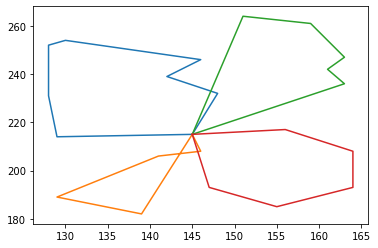

In [90]:
for x in bestSolution[0]:
    lst = []
    lst.append(graph[1])
    for y in x:
        lst.append(graph[y])
    lst.append(graph[1])
    arr = np.array(lst)
    plt.plot(arr[:,0], arr[:,1])
plt.show()